In [11]:
import torch
import numpy as np
from scipy.stats import pearsonr

In [2]:
dataset = 'region785' #['japan','region785', 'state360']
    # adjacency matrix filename (*-adj.txt)
if dataset == 'state360':
    sim_mat = 'state-adj-49'
    institueion_list = [[1, 2, 4, 5, 9, 10, 14, 21, 24, 25, 26, 29, 32, 35, 39, 42, 45, 48], [0, 3, 8, 11, 12, 13, 15, 16, 18, 20, 22, 23, 31, 33, 34, 38, 40, 41, 44, 46, 47], [6, 7, 17, 19, 27, 28, 30, 36, 37, 43]]
elif dataset == 'region785':
    sim_mat = 'region-adj'
    institueion_list = [[0, 1], [2, 3, 4, 5, 6], [7, 8, 9]]  # 机构划分列表
elif dataset == 'japan':
    sim_mat = 'japan-adj'
    institueion_list = [[0, 1, 2, 4, 6, 8, 9, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 46], [3, 5, 10, 19, 23, 45], [7, 11, 24, 25, 31, 38, 44]]
data = np.loadtxt(open("../data/{}.txt".format(dataset)), delimiter=',')
print(data.shape)

(785, 10)


In [29]:
n = data.shape[1]
# 将节点排序，相同机构的挨在一起
sort_int =[]
for instit in institueion_list:
    sort_int.extend(instit)

corr = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        a = sort_int[i]
        b = sort_int[j]
        corr[i,j], _ = pearsonr(data[:,a],data[:,b])


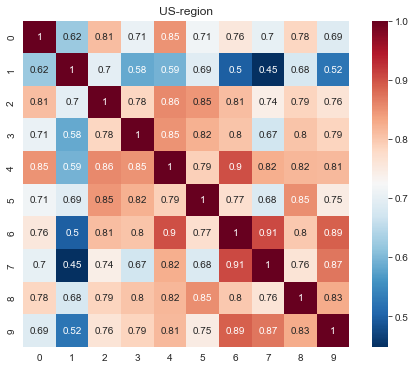

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6),facecolor='w')
# 指定颜色带的色系
sns.heatmap(corr,annot=True, vmax=1, square=True, cmap='RdBu_r', fmt='.2g')
plt.title('US-region')
plt.show()

In [43]:
rmse=torch.tensor([880,1095,367])#
nc=torch.tensor([2,5,3])
tot_rmse = torch.sqrt(torch.sum(rmse**2*nc)/torch.sum(nc))
print(tot_rmse)

tensor(891.5151)
